### Multivariate Newton-Raphson

Consider a system of $ n $ non-linear equations with $ n $ variables, given by

$$
G(x) = 0,
$$

- $ x \in \mathbb{R}^n $ and $ G(x) $ is $ n $-valued function.  
- **Jacobian matrix** is $ n $-by-$ n $ matrix of partial derivatives $ \nabla G(x) $  
- Newton step:  


$$
x_{i+1} = x_{i} - \big( \nabla G(x_i) \big)^{-1} G(x_i)
$$

#### Maximization of multivariate function

- classic example for multivariate Newton is solution of F.O.C. in multivariate optimization problems  
- consider $ F(x) \rightarrow \max $, where $ x \in \mathbb{R}^n $  
- let $ G(x) $ be the **gradient** of $ F(x) $, which is $ n $-valued function (derivatives with respect to each variable).  


$$
G(x) = \nabla F(x) = 0
$$

- Newton step in this case $ x_{i+1} = x_{i} - \big( \nabla^2 F(x_i) \big)^{-1} \nabla F(x_i) $  
- $ \nabla^2 F(x) $ is $ n $-by-$ n $ matrix of second derivatives is **Hessian matrix**  

#### Example

$$
F(x,y) = 2.575 - 2 \cos(x) \cos(y+\pi) - 0.575 \cos(1.25 \pi - 2x)
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

F = lambda x, y: 2.575 - 2*np.cos(x)*np.cos(y+np.pi) - 0.575*np.cos(1.25*np.pi - 2*x)

def contour_plot(fun,levels=20,bound=1,npoints=100,ax=None):
    '''Make a contour plot for illustrations'''
    xx = np.linspace(-bound, bound, npoints)
    yy = np.linspace(-bound, bound, npoints)
    X,Y = np.meshgrid(xx, yy)
    Z = fun(X, Y)
    if ax==None:
        fig, ax = plt.subplots(figsize=(10,8))
    cnt = ax.contour(X,Y,Z, vmin=Z.min(), vmax=Z.max(),levels=np.linspace(Z.min(),Z.max(),levels))
    ax.set_aspect('equal', 'box')
    return cnt

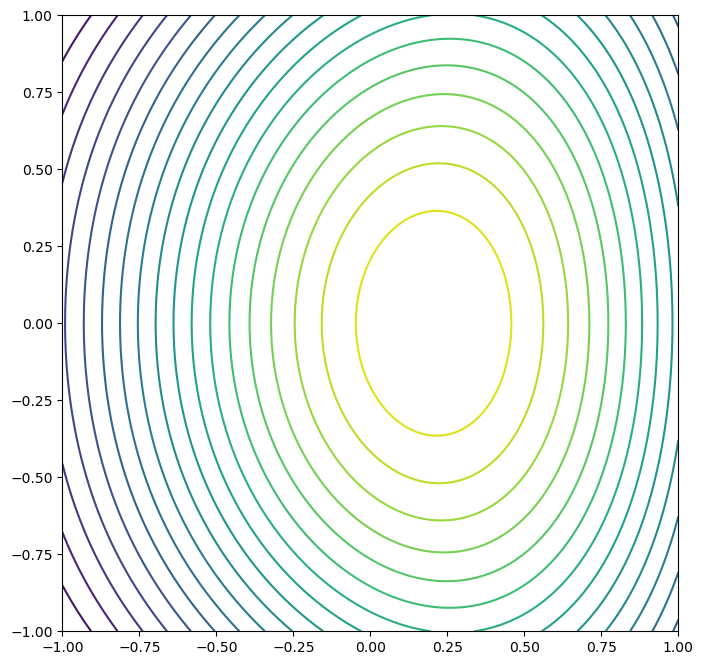

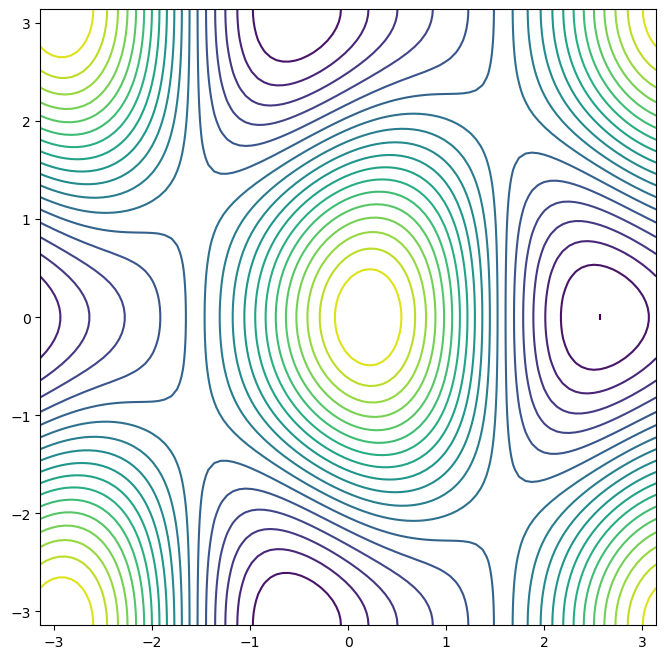

In [4]:
contour_plot(F)
contour_plot(F,bound=np.pi)

#### Jacobian and Hessian

$$
F(x,y) = 2.575 - 2 \cos(x) \cos(y+\pi) - 0.575 \cos(1.25 \pi - 2x)
$$

$$
G(x,y) =
\begin{pmatrix}
2 \sin(x) \cos(y+\pi) - 1.15 \sin(1.25\pi - 2x) \\
2 \cos(x) \sin(y+\pi) \\
\end{pmatrix}
$$

$$
H(x,y) =
\begin{pmatrix}
2 \cos(x) \cos(y+\pi) + 2.3 \cos(1.25\pi - 2x) & -2 \sin(x) \sin(y+\pi) \\
-2 \sin(x) \sin(y+\pi) & 2 \cos(x) \cos(y+\pi) \\
\end{pmatrix}
$$

In [14]:
G = lambda x, y: [2*np.sin(x)*np.cos(y+np.pi) - 2*0.575 * np.sin(1.25*np.pi - 2*x),
                  2*np.cos(x)*np.sin(y+np.pi)]
H = lambda x, y: [[2*np.cos(x)*np.cos(y+np.pi) - 2*0.575 * np.sin(1.25*np.pi - 2*x),
                   -2*np.sin(x)*np.sin(y+np.pi)],
                  [-2*np.sin(x)*np.sin(y+np.pi),
                    2*np.cos(x)*np.cos(y+np.pi)]]

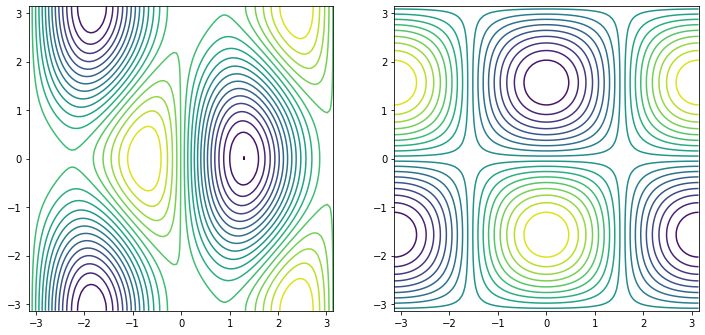

In [15]:
fig, axs = plt.subplots(1, 2)
contour_plot(lambda x,y: G(x,y)[0],ax=axs[0],bound=np.pi)
contour_plot(lambda x,y: G(x,y)[1],ax=axs[1],bound=np.pi)

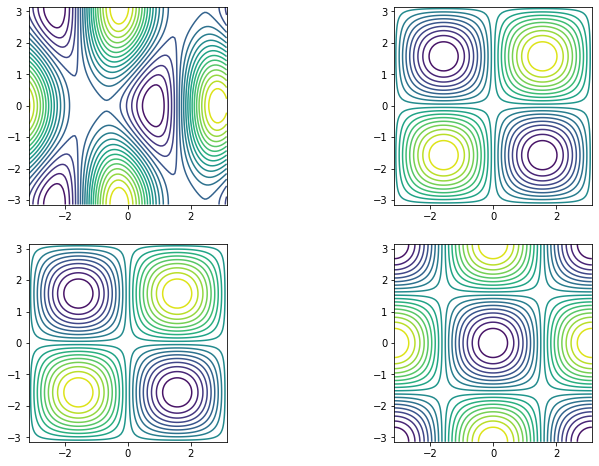

In [16]:
fig, axs = plt.subplots(2, 2)
contour_plot(lambda x,y: H(x,y)[0][0],ax=axs[0,0],bound=np.pi)
contour_plot(lambda x,y: H(x,y)[0][1],ax=axs[0,1],bound=np.pi)
contour_plot(lambda x,y: H(x,y)[1][0],ax=axs[1,0],bound=np.pi)
contour_plot(lambda x,y: H(x,y)[1][1],ax=axs[1,1],bound=np.pi)

In [17]:
def newton2(fun,grad,x0,tol=1e-6,maxiter=100,callback=None):
    '''Newton method for solving equation f(x)=0, x is vector of 2 elements,
    with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    # conversion to array function of array argument
    npfun = lambda x: np.asarray(fun(x[0],x[1]))
    npgrad = lambda x: np.asarray(grad(x[0],x[1]))
    for i in range(maxiter):
        x1 = x0 - np.linalg.inv(npgrad(x0)) @ npfun(x0)  # matrix version
        err = np.amax(np.abs(x1-x0))  # vector version
        if callback != None: callback(iter=i,err=err,x0=x0,x1=x1,fun=fun)
        if err<tol: break
        x0 = x1
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return x1

In [32]:
def plot_step(**kwargs):
    plot_step.counter += 1
    x0,x1 = kwargs['x0'],kwargs['x1']
    b = max(np.amax(np.abs(x0)),np.amax(np.abs(x1)))+1
    if plot_step.counter == 1 or b>plot_step.bound:
        plot_step.bound=b  # save the bound for later calls
        if plot_step.counter > 1:
            # remove old conrours if resdrawing
            for c in plot_step.contours.collections:
                c.remove()
        plot_step.contours = contour_plot(F,bound=b,ax=ax)
    ax.plot([x0[0],x1[0]],[x0[1],x1[1]],c='r')
    if plot_step.counter == 1:
        ax.scatter(x0[0],x0[1],c='r',edgecolors='r')
plot_step.counter = 0

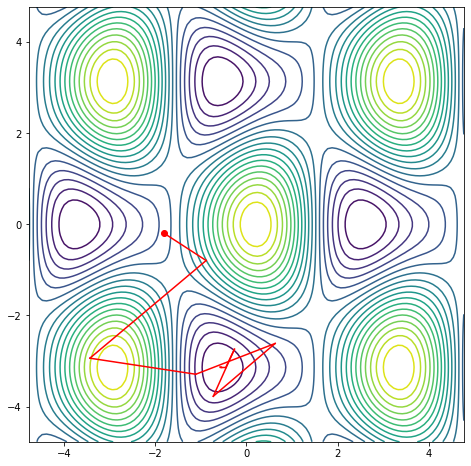

Converged in 14 steps
x*    = (-0.56967,-3.14159)
G(x*) = (9.68660e-08,0.00000e+00)


In [33]:
x0 = np.array([-1.8,-.2])
# x0 = np.array([-.8,-.2])
# x0 = np.array([-.2,1.8])
# x0 = np.array([-.2,-.2])
# x0 = np.array([-.25,1.5])
fig, ax = plt.subplots(1,1)
xs = newton2(G,H,x0,callback=plot_step)
plt.show()
print('Converged in %d steps'%plot_step.counter)
print('x*    = (%1.5f,%1.5f)'%tuple(xs))
print('G(x*) = (%1.5e,%1.5e)'%tuple(G(*tuple(xs))))